<a href="https://colab.research.google.com/github/sagar9926/Visualisations-/blob/master/PADHAI_Data_Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Tabulation

In [2]:
url = 'https://api.covid19india.org/states_daily.json'

In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve(url,'data.json')

('data.json', <http.client.HTTPMessage at 0x7f9b87600358>)

In [5]:
covid_data = pd.read_json('data.json')

In [6]:
covid_data

states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
514  {'an': '67', 'ap': '9350', 'ar': '94', 'as': '...
515  {'an': '0', 'ap': '84', 'ar': '0', 'as': '9', ...
516  {'an': '26', 'ap': '10392', 'ar': '148', 'as':...
517  {'an': '44', 'ap': '8454', 'ar': '96', 'as': '...
518  {'an': '1', 'ap': '72', 'ar': '0', 'as': '8', ...

[519 rows x 1 columns]

In [7]:
import json

In [8]:
with open ('data.json') as f:
  data = json.load(f)
data = data['states_daily']

In [9]:
covid_data = pd.json_normalize(data)
covid_data.head()

an ap ar as br ch ct       date dd dl  ... sk     status tg tn tr  tt un  up ut wb
0  0  1  0  0  0  0  0  14-Mar-20  0  7  ...  0  Confirmed  1  1  0  81  0  12  0  0
1  0  0  0  0  0  0  0  14-Mar-20  0  1  ...  0  Recovered  0  0  0   9  0   4  0  0
2  0  0  0  0  0  0  0  14-Mar-20  0  1  ...  0   Deceased  0  0  0   2  0   0  0  0
3  0  0  0  0  0  0  0  15-Mar-20  0  0  ...  0  Confirmed  2  0  0  27  0   1  0  0
4  0  0  0  0  0  0  0  15-Mar-20  0  1  ...  0  Recovered  1  0  0   4  0   0  0  0

[5 rows x 41 columns]

In [10]:
df = covid_data

In [11]:
df.date = pd.to_datetime(df.date)

In [12]:
df = df[df.status == "Confirmed"]

In [13]:
df.drop("status",axis = 1, inplace  = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df.set_index("date",inplace = True)

In [15]:
df.head()

an ap ar as br ch ct dd dl dn ga  ... py rj sk tg tn tr  tt un  up ut wb
date                                         ...                                   
2020-03-14  0  1  0  0  0  0  0  0  7  0  0  ...  0  3  0  1  1  0  81  0  12  0  0
2020-03-15  0  0  0  0  0  0  0  0  0  0  0  ...  0  1  0  2  0  0  27  0   1  0  0
2020-03-16  0  0  0  0  0  0  0  0  0  0  0  ...  1  0  0  1  0  0  15  0   0  1  0
2020-03-17  0  0  0  0  0  0  0  0  1  0  0  ...  0  0  0  1  0  0  11  0   2  0  1
2020-03-18  0  0  0  0  0  0  0  0  2  0  0  ...  0  3  0  8  1  0  37  0   2  1  0

[5 rows x 39 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2020-03-14 to 2020-09-02
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      173 non-null    object
 1   ap      173 non-null    object
 2   ar      173 non-null    object
 3   as      173 non-null    object
 4   br      173 non-null    object
 5   ch      173 non-null    object
 6   ct      173 non-null    object
 7   dd      173 non-null    object
 8   dl      173 non-null    object
 9   dn      173 non-null    object
 10  ga      173 non-null    object
 11  gj      173 non-null    object
 12  hp      173 non-null    object
 13  hr      173 non-null    object
 14  jh      173 non-null    object
 15  jk      173 non-null    object
 16  ka      173 non-null    object
 17  kl      173 non-null    object
 18  la      173 non-null    object
 19  ld      173 non-null    object
 20  mh      173 non-null    object
 21  ml      173 non-null    object
 22  mn     

In [17]:
df = df.apply(pd.to_numeric)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2020-03-14 to 2020-09-02
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      173 non-null    int64
 1   ap      173 non-null    int64
 2   ar      173 non-null    int64
 3   as      173 non-null    int64
 4   br      173 non-null    int64
 5   ch      173 non-null    int64
 6   ct      173 non-null    int64
 7   dd      173 non-null    int64
 8   dl      173 non-null    int64
 9   dn      173 non-null    int64
 10  ga      173 non-null    int64
 11  gj      173 non-null    int64
 12  hp      173 non-null    int64
 13  hr      173 non-null    int64
 14  jh      173 non-null    int64
 15  jk      173 non-null    int64
 16  ka      173 non-null    int64
 17  kl      173 non-null    int64
 18  la      173 non-null    int64
 19  ld      173 non-null    int64
 20  mh      173 non-null    int64
 21  ml      173 non-null    int64
 22  mn      173 non-null    int64
 

In [19]:
df.tail(7)

an     ap   ar    as    br   ch  ...   tr     tt  un    up   ut    wb
date                                         ...                                 
2020-08-27  33  10621   78  2036  1860  188  ...  385  76827   0  5391  728  2997
2020-08-28  32  10526  112  2560  1998  160  ...  509  76657   0  5405  588  2982
2020-08-29  31  10548  132  2427  2087  261  ...  443  78479   0  5633  706  3012
2020-08-30  23  10603  157  1980  2078  170  ...  447  79461   0  6175  664  3019
2020-08-31  28  10004   78  3266  1324  191  ...  321  68766   0  4782  592  2993
2020-09-01  28  10368  100  2684  1928  204  ...  509  78168   0  5343  571  2943
2020-09-02  26  10392  148  3555  1969  239  ...  566  82860   0  5682  836  2976

[7 rows x 39 columns]

## Styling Tabulation

In [20]:
df = df.tail(7)

In [21]:
df.style

In [22]:
def color_red_negetive(x):
  color = 'red' if x < 0 else 'black'
  return 'color:' + color 

In [23]:
df.style.applymap(color_red_negetive)

In [24]:
df.drop("un",inplace = True,axis = 1)

In [25]:
df.style.applymap(color_red_negetive)

In [26]:
df.style.highlight_max(color = "red")

In [27]:
df.drop(["dd","ld"],axis = 1, inplace = True)

In [28]:
df.style.highlight_max(color = "red").highlight_min(color = "green")

In [29]:
df.drop("tt",inplace = True,axis = 1)

In [30]:
def bold_max_value(x):
  is_max = (x == x.max())
  return['font-weight: bold' if y else '' for y in is_max]

In [31]:
df.style.apply(bold_max_value)

In [32]:
df.style.apply(bold_max_value).highlight_min(color = "green")

In [33]:
df.style.apply(bold_max_value).highlight_max(color = "red",axis = 1)

In [34]:
df.style.background_gradient(cmap = "Reds")

In [35]:
df.style.background_gradient(cmap = "Reds", axis = 1)

In [36]:
df.style.bar()

In [37]:
df.style.bar(subset = ["mh","tn","dl"])

In [38]:
df[["mh","tn","dl"]].style.bar()

In [39]:
df[["mh","tn","dl"]].style.bar(subset = ["mh"] , color = "red").bar(subset = ["tn"] , color = "green").bar(subset = ["dl"] , color = "yellow")

# Distribution of data 

## Distribution of Continuous Variable 


### Histogram

In [40]:
x = np.random.normal(size  = 1000)
sns.set(color_codes = True)

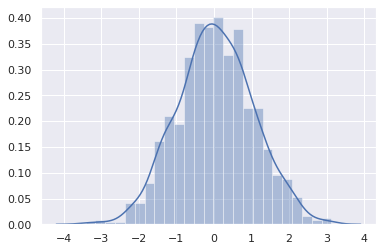

In [41]:
sns.distplot(x);

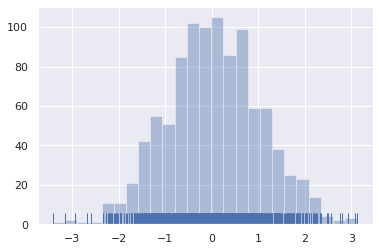

In [42]:
sns.distplot(x , kde = False , rug = True);

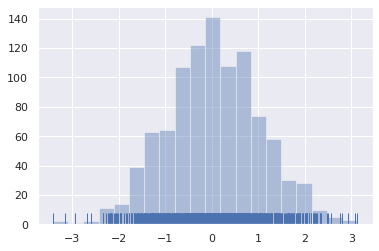

In [43]:
sns.distplot(x , kde = False , rug = True,bins = 20);

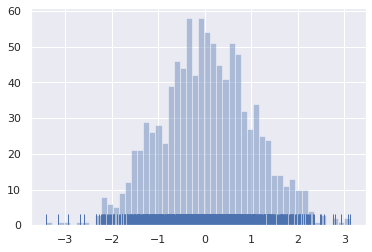

In [44]:
sns.distplot(x , kde = False , rug = True,bins = 50);

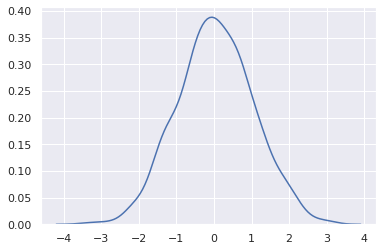

In [45]:
sns.kdeplot(x);

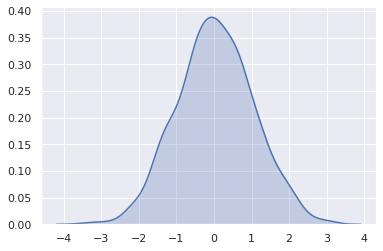

In [46]:
sns.kdeplot(x,shade = True);

In [47]:
y = np.random.uniform(size = 1000)

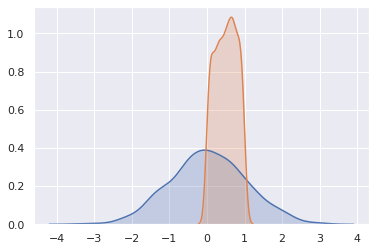

In [48]:
sns.kdeplot(x,shade = True);
sns.kdeplot(y,shade = True);

In [49]:
d = sns.load_dataset('diamonds')

In [50]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [51]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


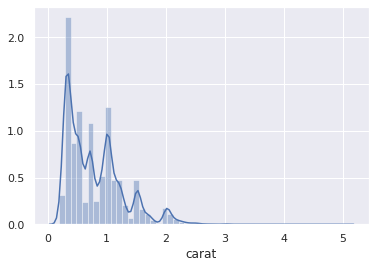

In [52]:
sns.distplot(d.carat);

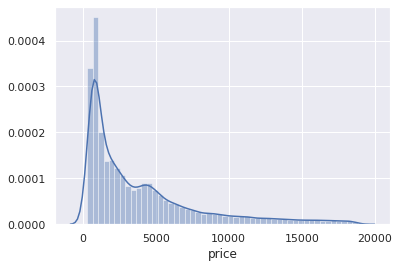

In [53]:
sns.distplot(d.price);

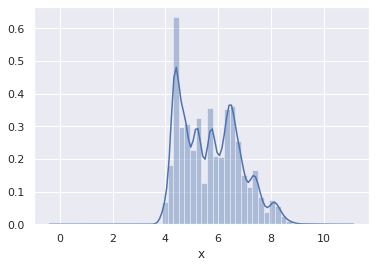

In [54]:
sns.distplot(d.x);

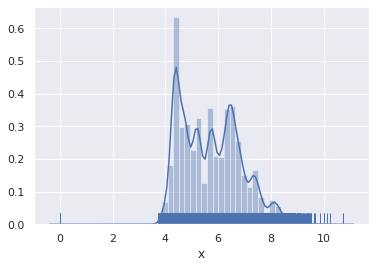

In [55]:
sns.distplot(d.x, rug = True);

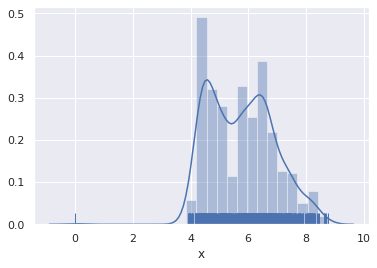

In [56]:
sns.distplot(d.sample(1000).x, rug = True);

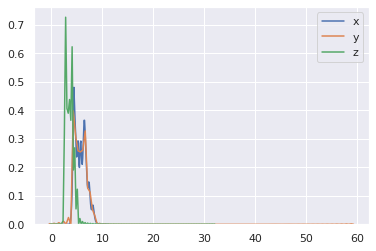

In [57]:
sns.kdeplot(d.x);
sns.kdeplot(d.y);
sns.kdeplot(d.z);

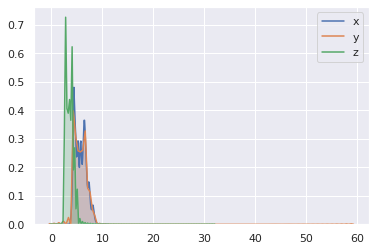

In [58]:
sns.kdeplot(d.x, shade = True);
sns.kdeplot(d.y, shade = True);
sns.kdeplot(d.z, shade = True);

### Box Plot

In [59]:
x = np.random.normal(size = 1000)

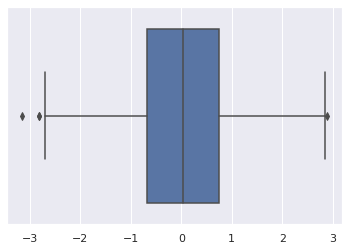

In [60]:
sns.boxplot(x)

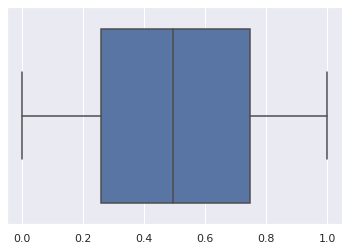

In [61]:
x = np.random.uniform(size = 1000)
sns.boxplot(x);

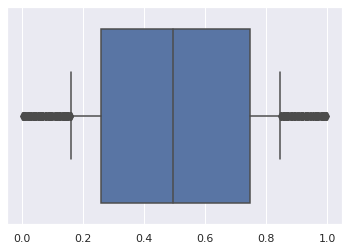

In [62]:
sns.boxplot(x,whis = 0.2);

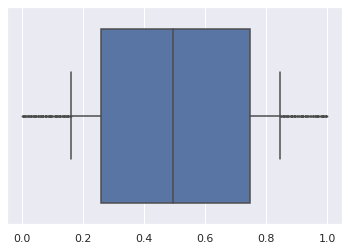

In [63]:
sns.boxplot(x,whis = 0.2,fliersize = 1);

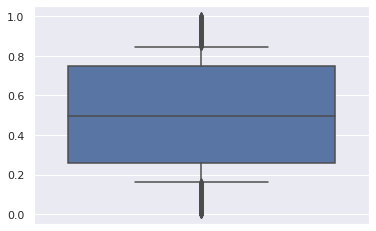

In [64]:
sns.boxplot(x,whis = 0.2,orient = "v");

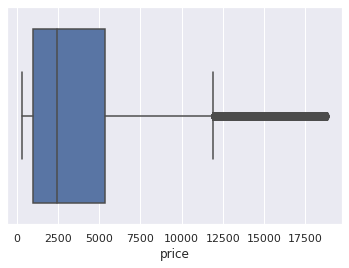

In [65]:
sns.boxplot(d.price);

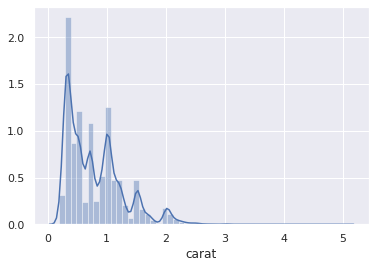

In [66]:
sns.distplot(d.carat)

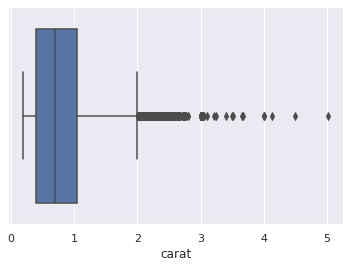

In [67]:
sns.boxplot(d.carat)

### Boxen plot

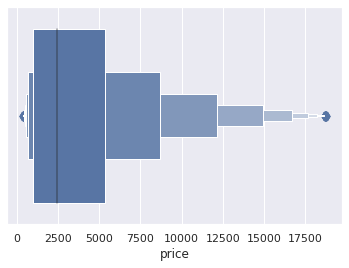

In [68]:
sns.boxenplot(d.price);

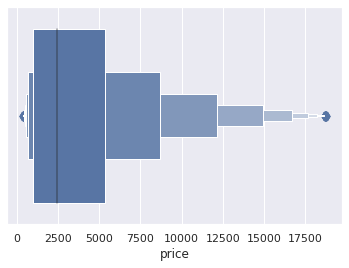

In [69]:
sns.boxenplot(d.price);

In [70]:
sns.boxenplot(x = 'island' , y = 'body_mass_g' , data = p)

NameError: ignored

## Distribution of categorical variables

### Bar plots

In [73]:
c  = d.groupby('cut')['cut'].count()

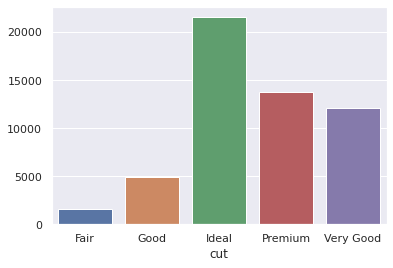

In [74]:
sns.barplot(x = c.index,y  = c.values);

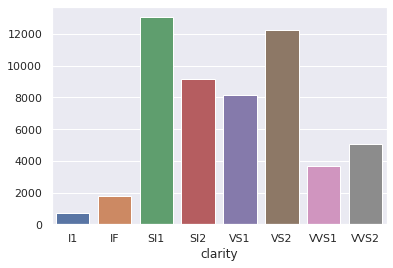

In [75]:
c  = d.groupby('clarity')['clarity'].count()
sns.barplot(x = c.index,y  = c.values);


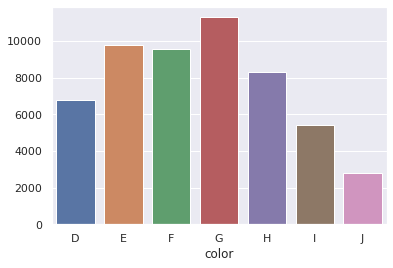

In [76]:
c  = d.groupby('color')['color'].count()
sns.barplot(x = c.index,y  = c.values);


## Joint distribution of two variables

### Jointplot

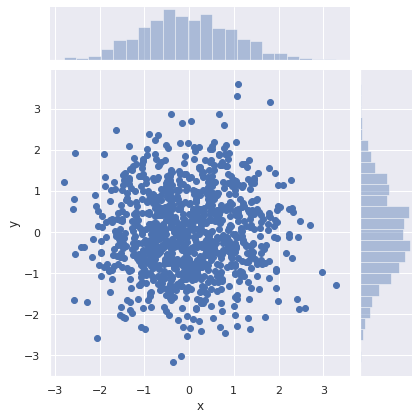

In [77]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

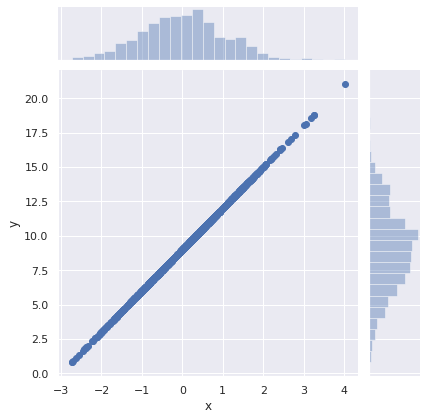

In [78]:
x = np.random.normal(size = 1000)
y = 3*x + 9 
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

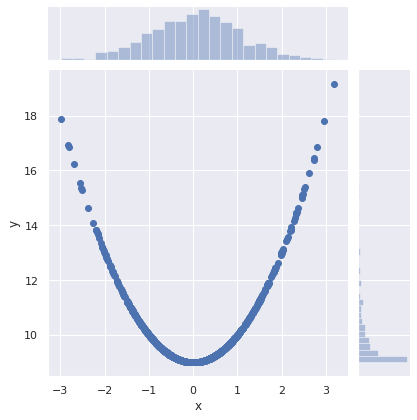

In [79]:
x = np.random.normal(size = 1000)
y = x**2 + 9 
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df);

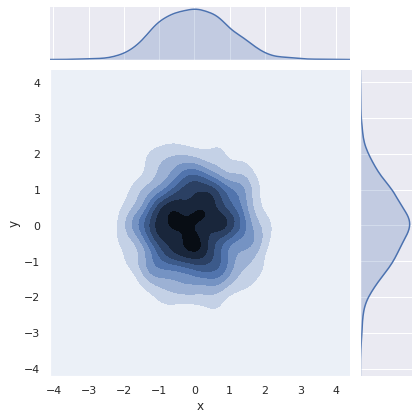

In [80]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

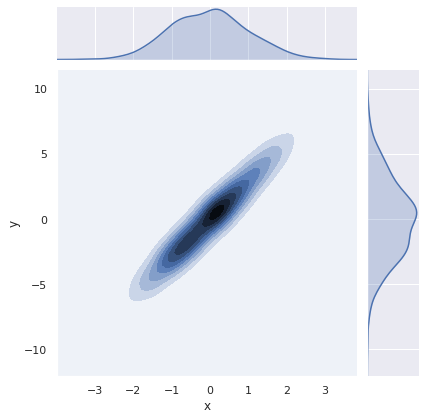

In [81]:
x = np.random.normal(size = 1000)
y = 3*x + np.random.normal(size = 1000)/5
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

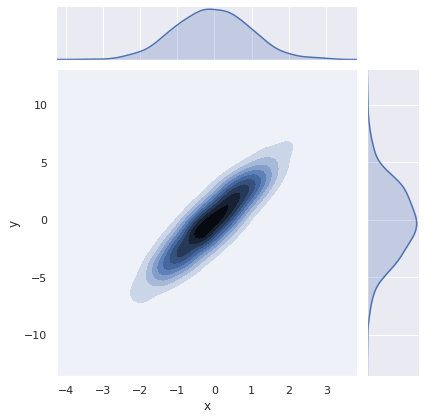

In [82]:
x = np.random.normal(size = 1000)
y = 3*x + np.random.normal(size = 1000)
df = pd.DataFrame({'x': x , 'y' : y})
sns.jointplot('x' , 'y' , data = df , kind = 'kde');

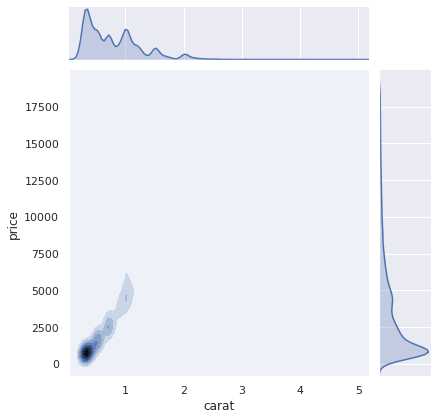

In [83]:
sns.jointplot("carat","price",data = d, kind = 'kde')

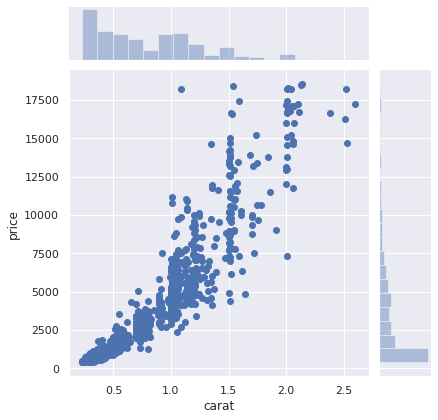

In [84]:
sns.jointplot("carat","price",data = d.sample(1000))

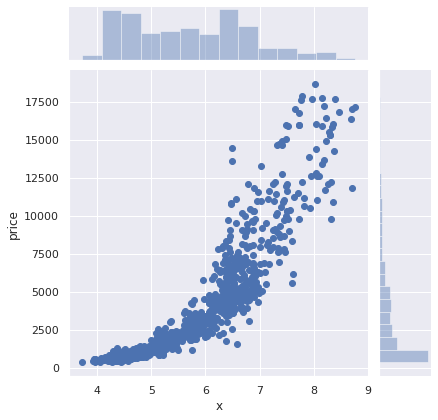

In [85]:
sns.jointplot("x","price",data = d.sample(1000))

### Swarm plot

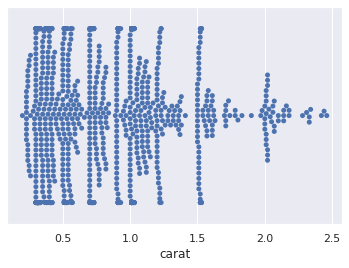

In [86]:
sns.swarmplot(d.sample(1000).carat)

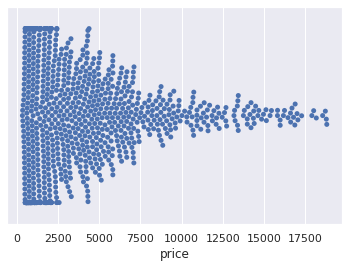

In [87]:
sns.swarmplot(d.sample(1000).price);

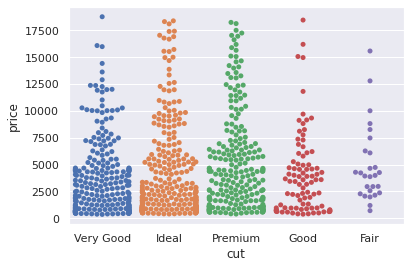

In [88]:
sns.swarmplot(x = 'cut', y = 'price', data = d.sample(1000))

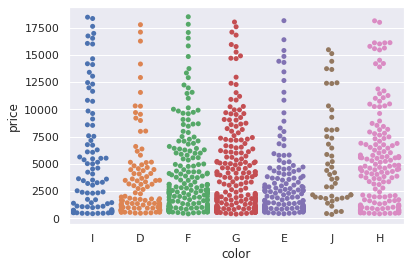

In [89]:
sns.swarmplot(x = 'color', y = 'price', data = d.sample(1000))

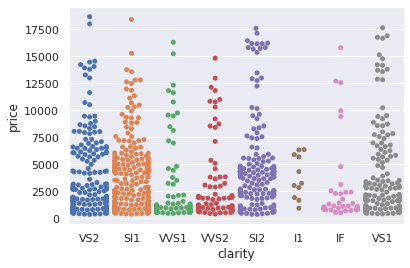

In [90]:
sns.swarmplot(x = 'clarity', y = 'price', data = d.sample(1000))

In [91]:
p = sns.load_dataset('penguins')

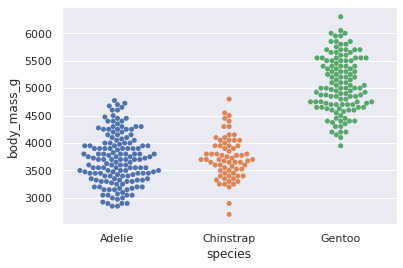

In [92]:
sns.swarmplot(x = 'species',y = "body_mass_g", data = p)

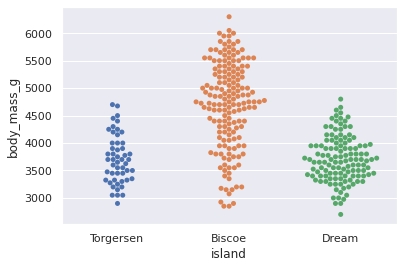

In [93]:
sns.swarmplot(x = 'island',y = "body_mass_g", data = p)

### Violin plot

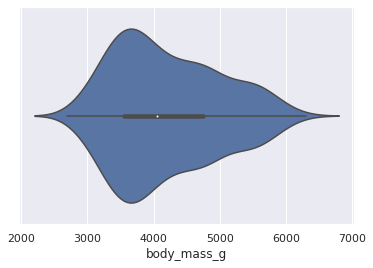

In [94]:
sns.violinplot(x = 'body_mass_g', data = p)

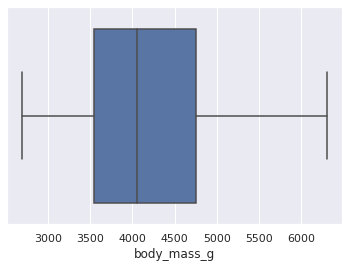

In [95]:
sns.boxplot(x = 'body_mass_g', data = p)

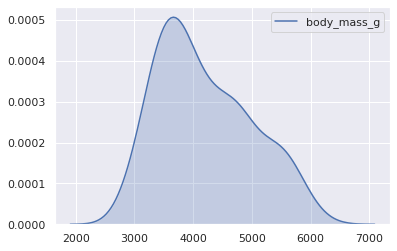

In [96]:
sns.kdeplot(p.body_mass_g , shade = True)

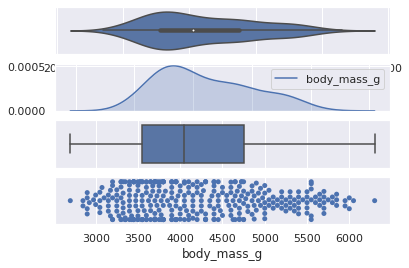

In [97]:
fig , axs  = plt.subplots(nrows = 4)
sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);

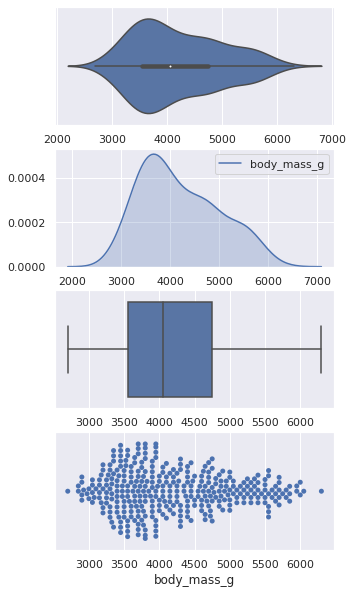

In [98]:
fig , axs  = plt.subplots(nrows = 4)
fig.set_size_inches(5,10)
sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);

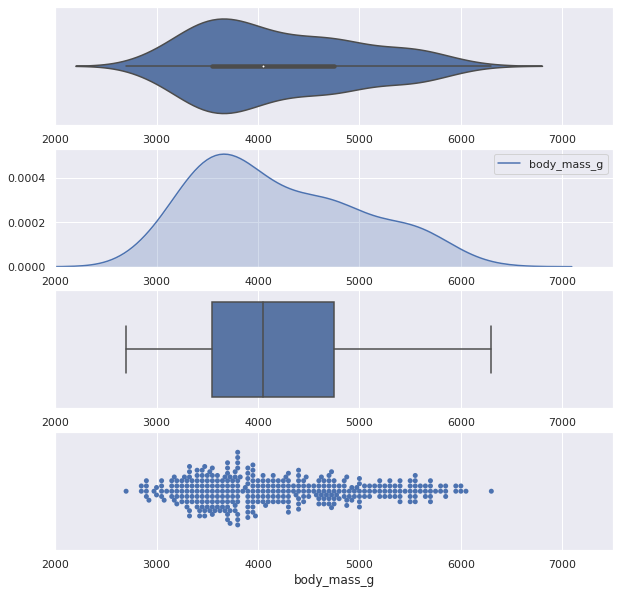

In [99]:
fig , axs  = plt.subplots(nrows = 4)
fig.set_size_inches(10,10)
p1 = sns.violinplot(x = 'body_mass_g', data = p,ax = axs[0]);
p1.set(xlim = (2000,7500));

p2 = sns.kdeplot(p.body_mass_g , shade = True,ax = axs[1]);
p2.set(xlim = (2000,7500));

p3 = sns.boxplot(x = 'body_mass_g', data = p,ax = axs[2]);
p3.set(xlim = (2000,7500));

p4 = sns.swarmplot(x = 'body_mass_g', data = p,ax = axs[3]);
p4.set(xlim = (2000,7500));


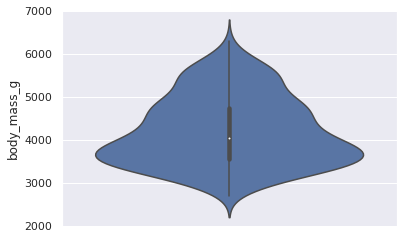

In [100]:
sns.violinplot(x = 'body_mass_g', data = p, orient = 'v');

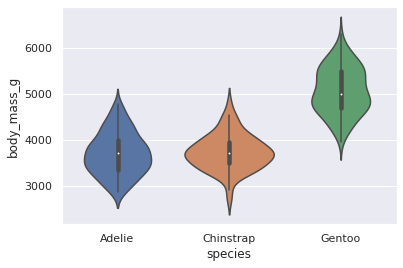

In [101]:
sns.violinplot(x = 'species', y = 'body_mass_g', data = p);

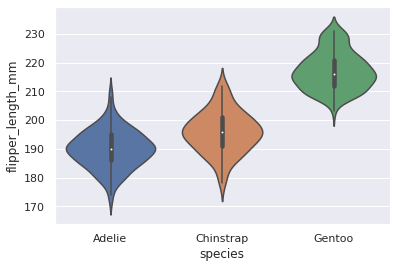

In [102]:
sns.violinplot(x = 'species', y = 'flipper_length_mm', data = p);

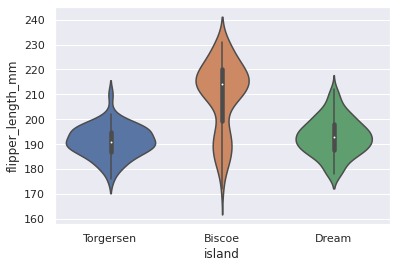

In [103]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p);

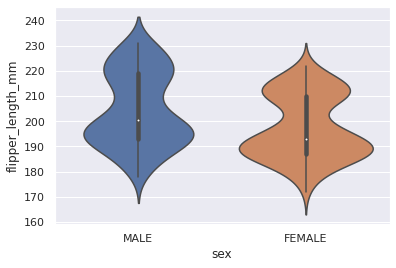

In [104]:
sns.violinplot(x = 'sex', y = 'flipper_length_mm', data = p);

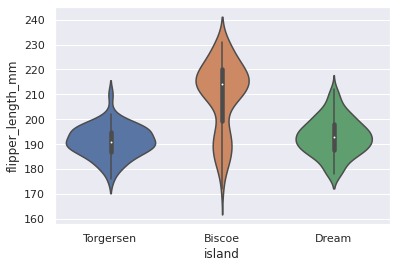

In [105]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p);

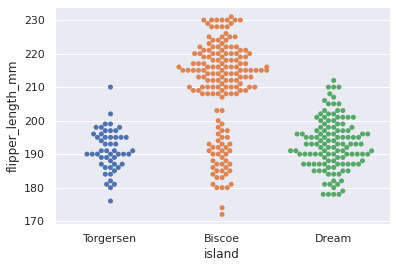

In [106]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p);

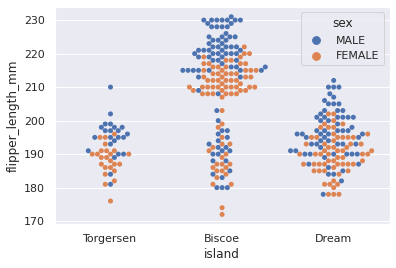

In [107]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p , hue = 'sex');

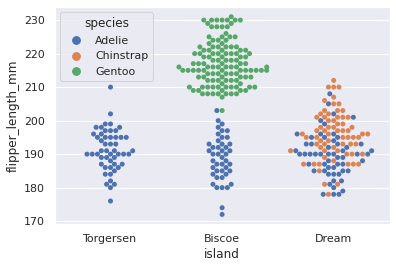

In [108]:
sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = p , hue = 'species');

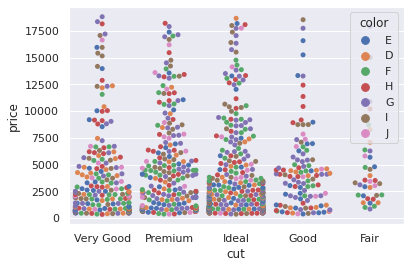

In [109]:
sns.swarmplot(x = 'cut', y = 'price', data = d.sample(1000), hue = 'color');

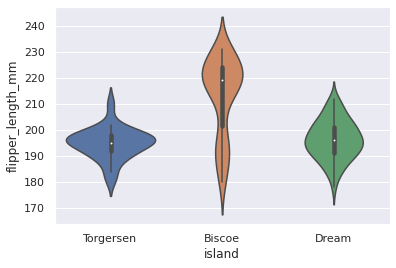

In [110]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p[p.sex == "MALE"]);

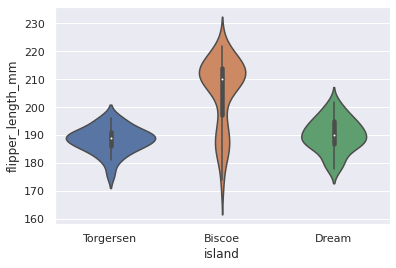

In [111]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p[p.sex == "FEMALE"]);

### Paired violin plot

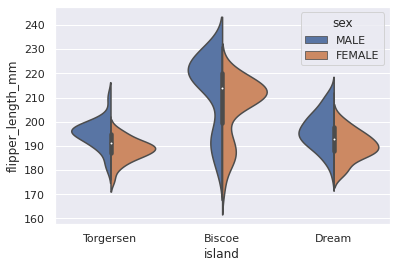

In [112]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex",split = True);

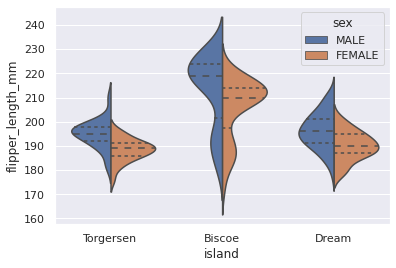

In [113]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex",
               split = True , inner = 'quartile');

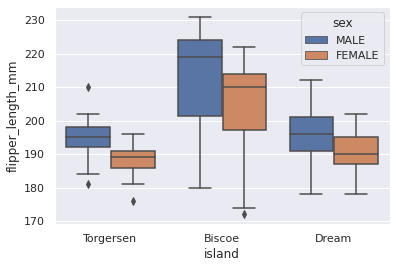

In [114]:
sns.boxplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "sex");

In [115]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "species",
               split = True , inner = 'quartile');

ValueError: ignored

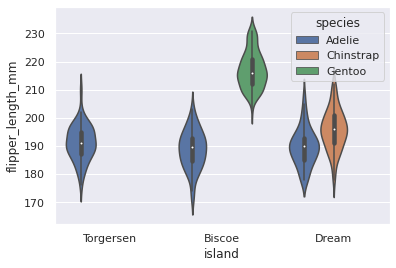

In [116]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "species");

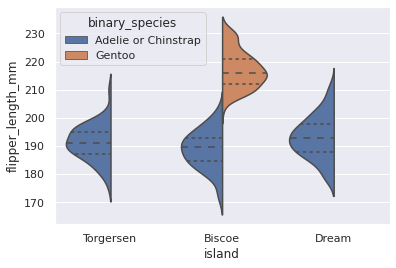

In [117]:
p['binary_species'] = p.species.apply(lambda x : 'Gentoo' if x == 'Gentoo' else 'Adelie or Chinstrap')

sns.violinplot(x = 'island', y = 'flipper_length_mm', data = p,hue = "binary_species",
               split = True , inner = 'quartile');

### Faceted Plot

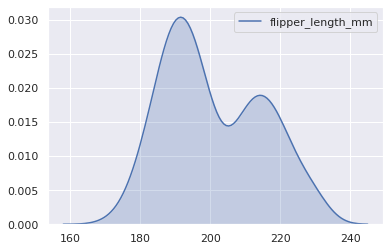

In [118]:
sns.kdeplot(p.flipper_length_mm,shade = True)

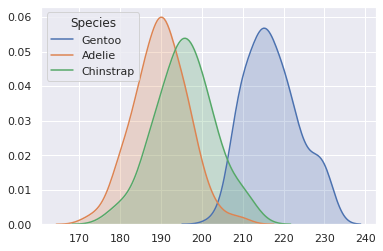

In [119]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True)
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True)
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True)
plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


In [120]:
p.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

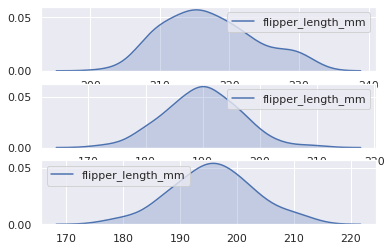

In [121]:
fig , axs = plt.subplots(nrows = 3)
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True , ax  = axs[0])
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True, ax  = axs[1])
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True, ax  = axs[2])
#plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


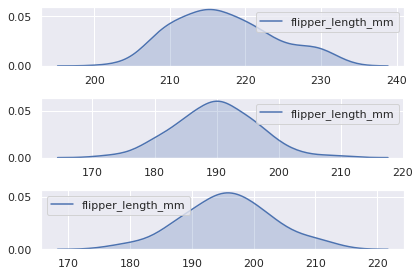

In [122]:
fig , axs = plt.subplots(nrows = 3)
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm,shade = True , ax  = axs[0])
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm,shade = True, ax  = axs[1])
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm,shade = True, ax  = axs[2])
plt.tight_layout()
#plt.legend(title = 'Species' , labels = ['Gentoo','Adelie','Chinstrap'])


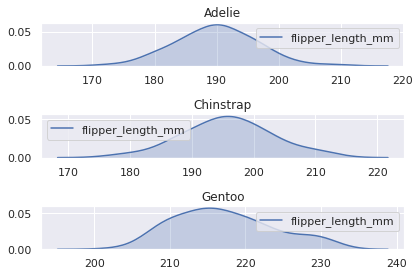

In [123]:
column_name = "species"
nrows = len(p[column_name].unique())
fig , axs = plt.subplots(nrows = nrows)
i = 0

for c_v in p[column_name].unique():
  pl = sns.kdeplot(p[p[column_name] == c_v].flipper_length_mm,shade = True , ax  = axs[i])
  pl.set_title(c_v)
  i = i + 1

plt.tight_layout()

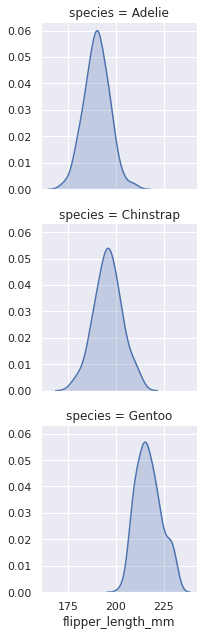

In [124]:
g = sns.FacetGrid(p , row = 'species');
g.map(sns.kdeplot,'flipper_length_mm',shade = True);

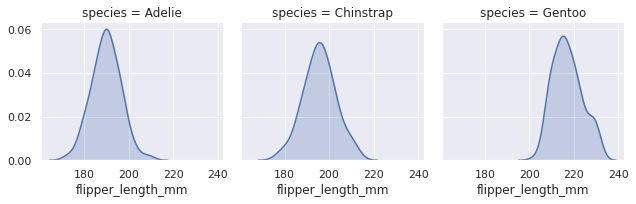

In [125]:
g = sns.FacetGrid(p , col = 'species');
g.map(sns.kdeplot,'flipper_length_mm',shade = True);

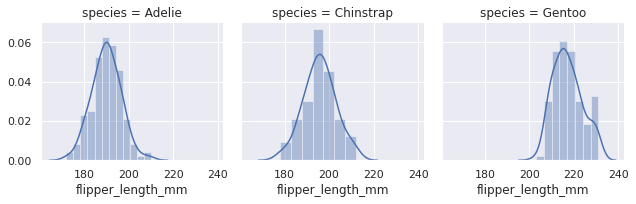

In [126]:
g = sns.FacetGrid(p , col = 'species');
g.map(sns.distplot,'flipper_length_mm');

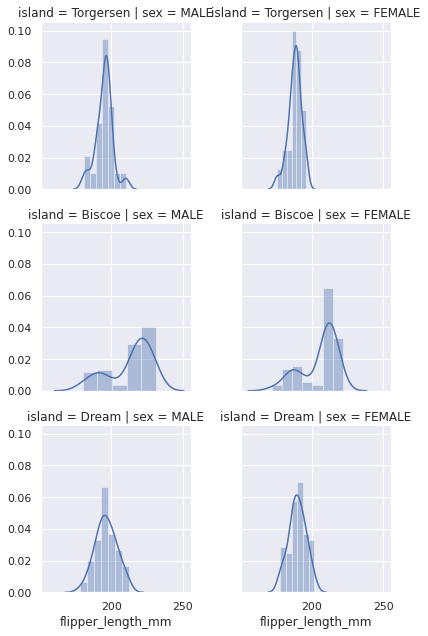

In [127]:
g = sns.FacetGrid(p , row = 'island', col = 'sex');
g.map(sns.distplot,'flipper_length_mm');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


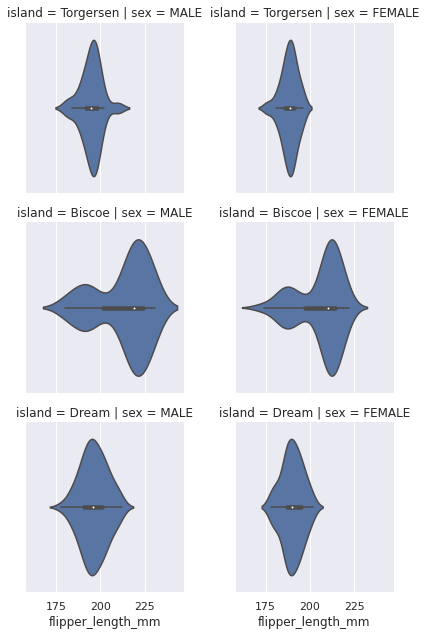

In [128]:
g = sns.FacetGrid(p , row = 'island', col = 'sex');
g.map(sns.violinplot,'flipper_length_mm');

### Pair plot

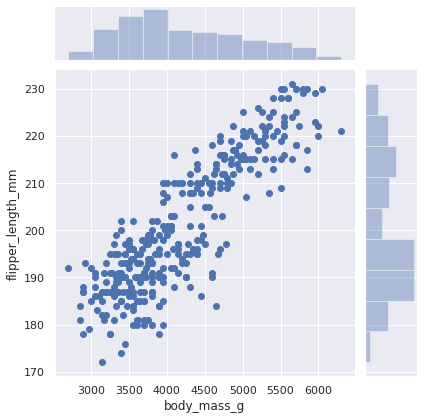

In [129]:
sns.jointplot(p.body_mass_g,p.flipper_length_mm);

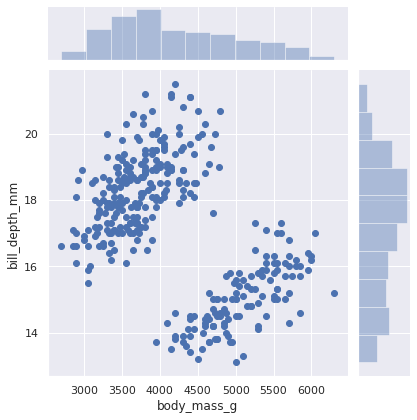

In [130]:
sns.jointplot(p.body_mass_g,p.bill_depth_mm);

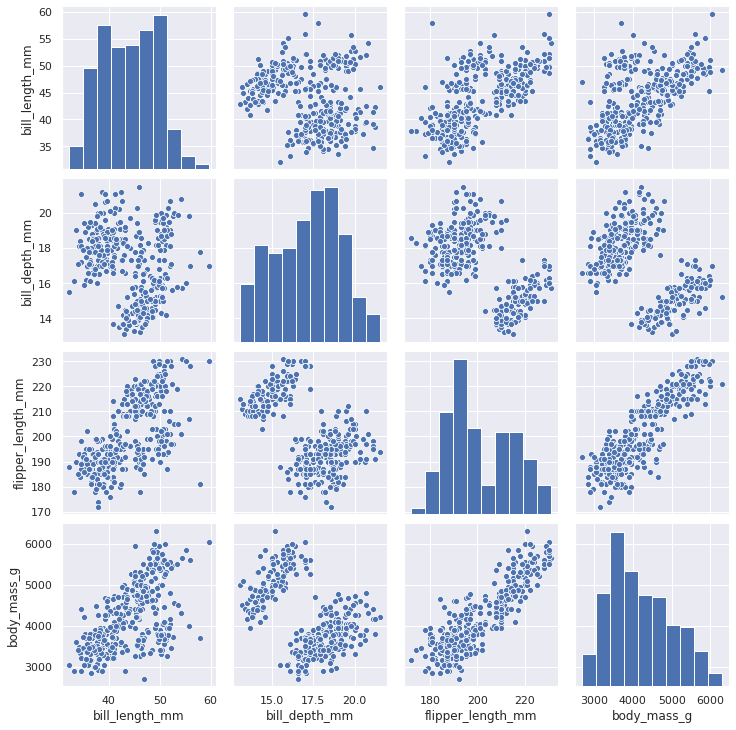

In [131]:
sns.pairplot(p);

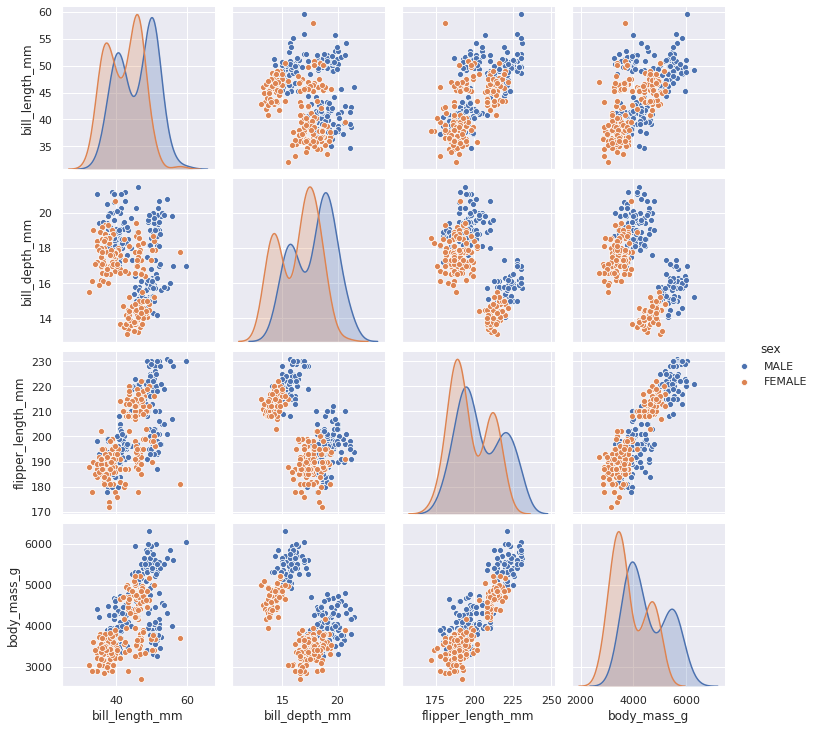

In [132]:
sns.pairplot(p , hue = 'sex');

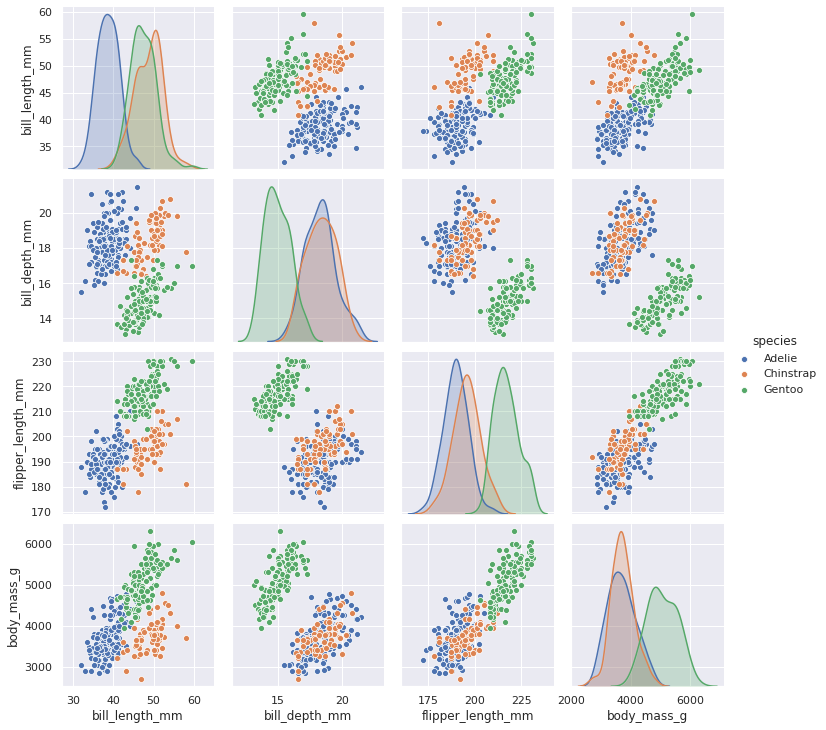

In [133]:
sns.pairplot(p , hue = 'species');

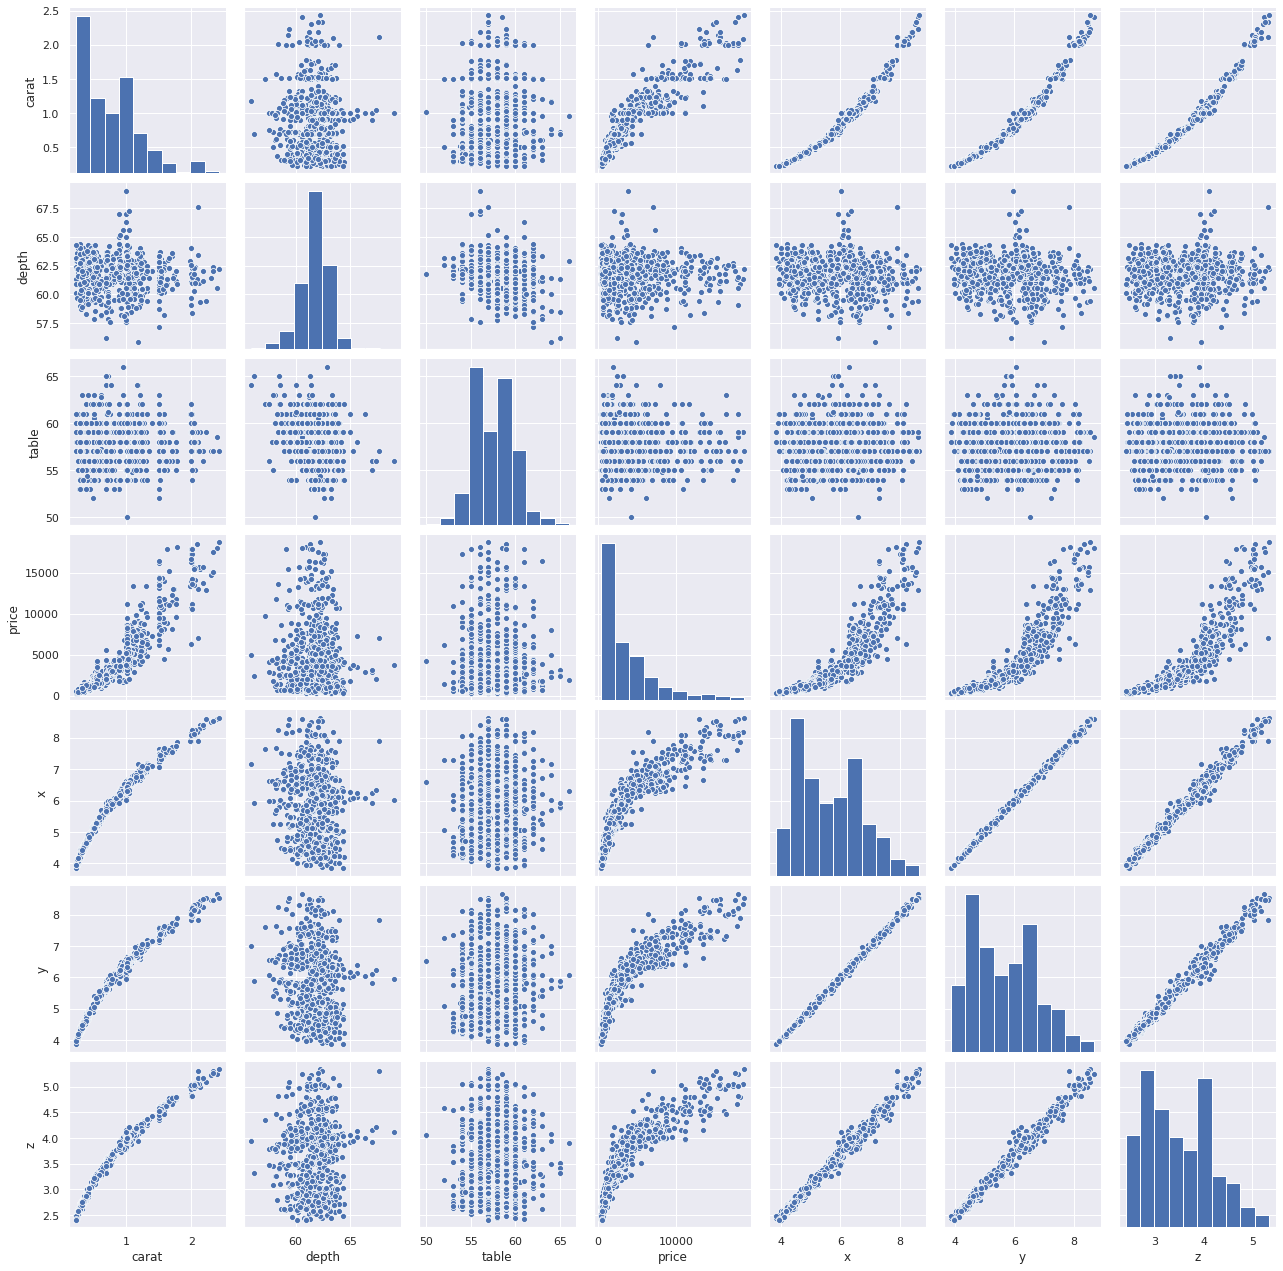

In [134]:
sns.pairplot(d.sample(1000))

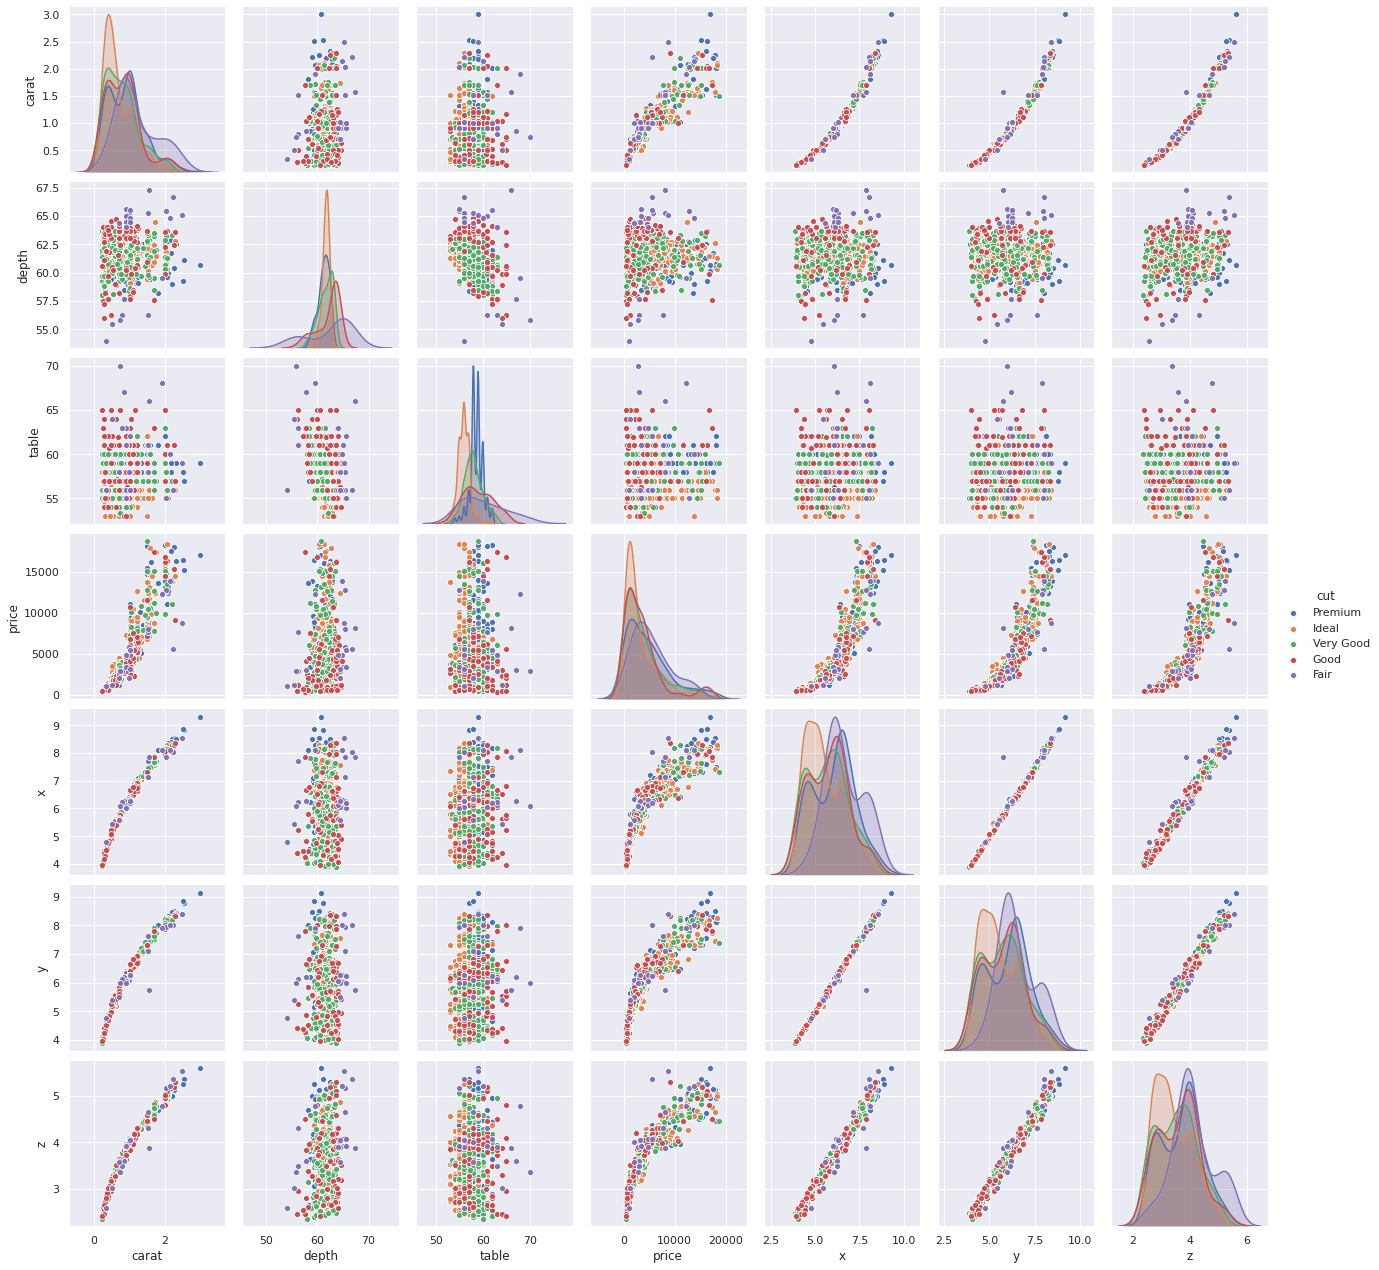

In [135]:
sns.pairplot(d.sample(1000), hue = 'cut')

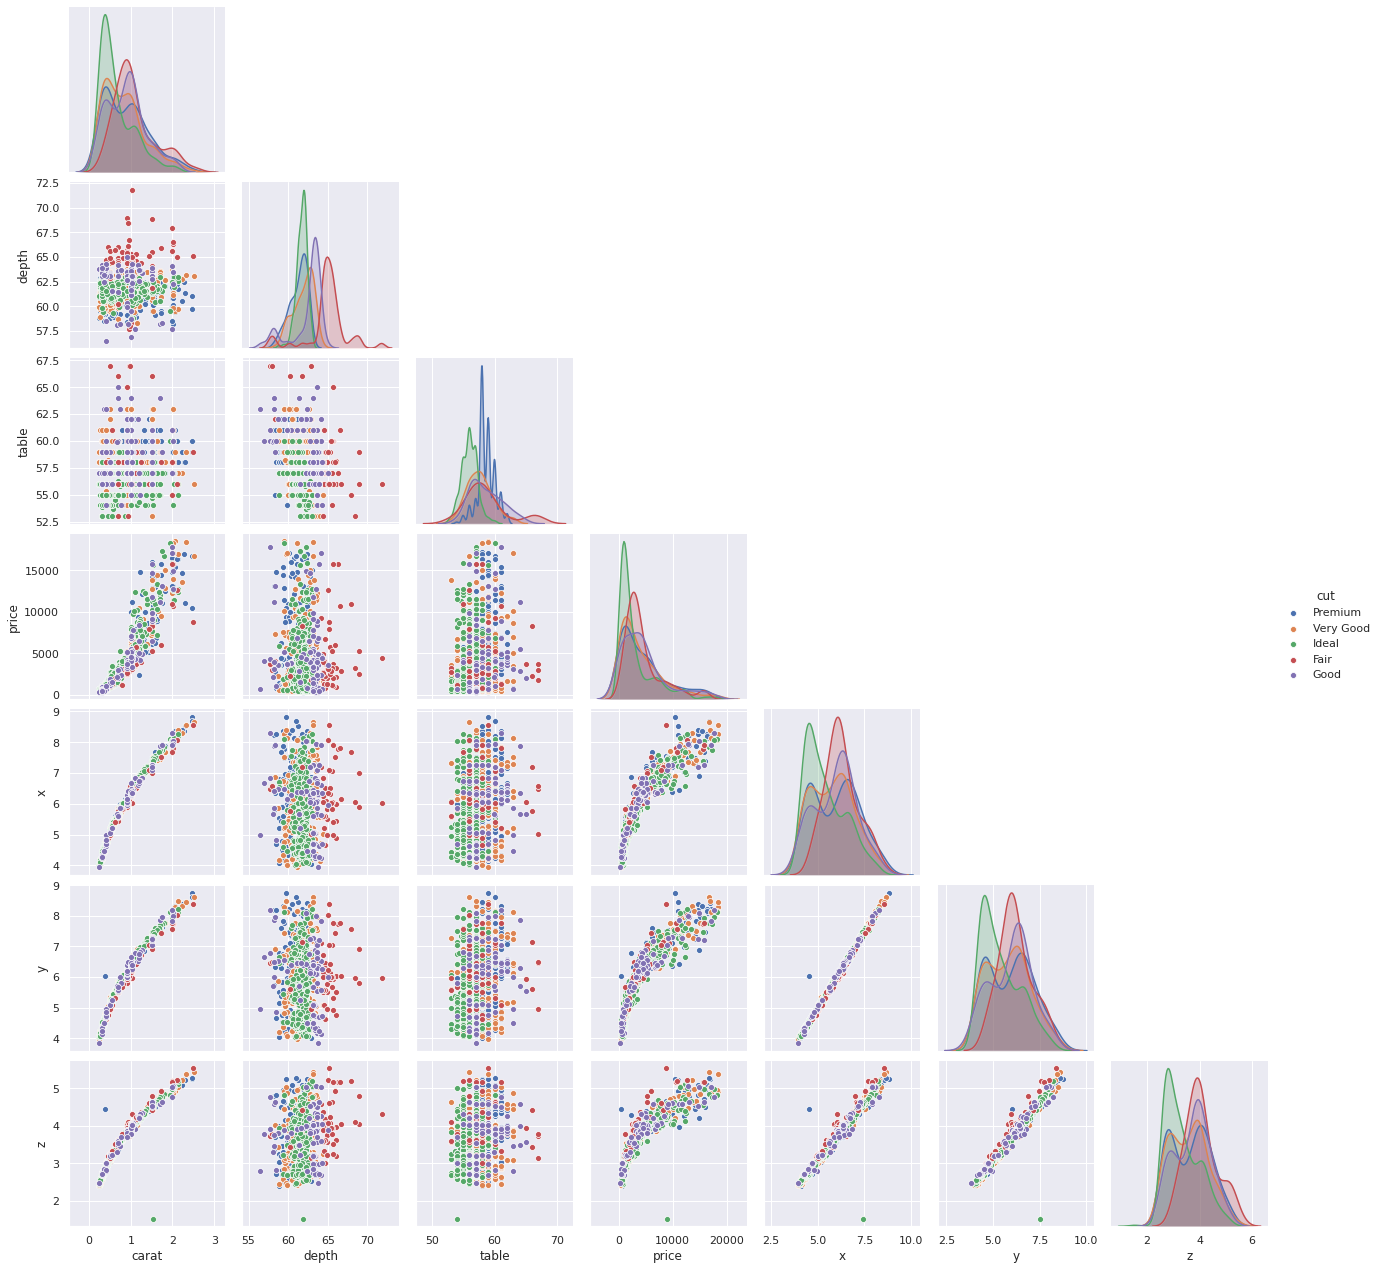

In [136]:
sns.pairplot(d.sample(1000), hue = 'cut',corner = True)

# Plotting the composition of data

## Static Composition

### Pie Chart

In [138]:
p = sns.load_dataset("penguins")

In [139]:
p.head()

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]

In [145]:
c = p.groupby('species')['species'].count()

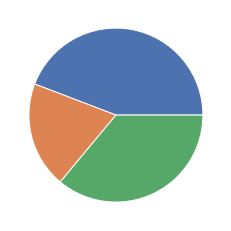

In [146]:
plt.pie(c)
plt.show()

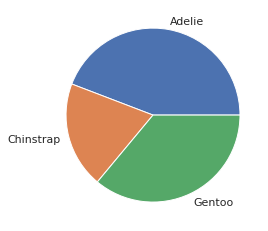

In [147]:
plt.pie(c , labels = c.index)
plt.show()

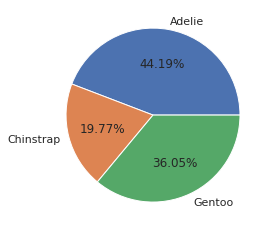

In [152]:
plt.pie(c , labels = c.index , autopct="%.2f%%")
plt.show()

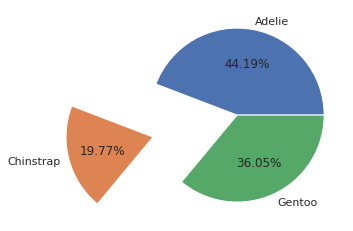

In [153]:
plt.pie(c , labels = c.index , autopct="%.2f%%" , explode = [ 0 , 1 , 0])
plt.show()

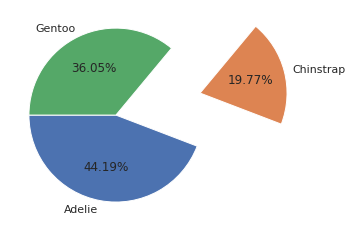

In [154]:
plt.pie(c , labels = c.index , autopct="%.2f%%" , explode = [ 0 , 1 , 0] , startangle = 180)
plt.show()

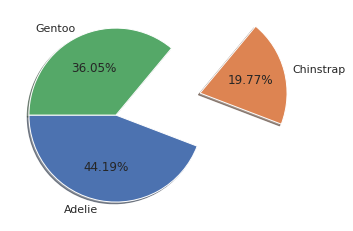

In [155]:
plt.pie(c , labels = c.index , autopct="%.2f%%" , explode = [ 0 , 1 , 0] , startangle = 180 , shadow = True)
plt.show()

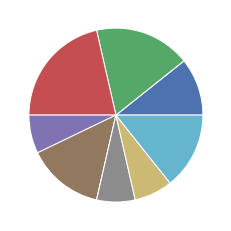

In [158]:
plt.pie(np.random.randint(0,10,10 ))
plt.show()

### Donut Chart

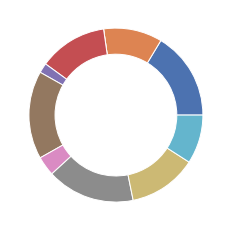

In [160]:
plt.pie(np.random.randint(0,10,10) , wedgeprops= dict(width = 0.3))
plt.show()

In [165]:
cmap = plt.get_cmap('Accent')
my_colours = cmap(np.arange(10))
my_colours

array([[0.49803922, 0.78823529, 0.49803922, 1.        ],
       [0.74509804, 0.68235294, 0.83137255, 1.        ],
       [0.99215686, 0.75294118, 0.5254902 , 1.        ],
       [1.        , 1.        , 0.6       , 1.        ],
       [0.21960784, 0.42352941, 0.69019608, 1.        ],
       [0.94117647, 0.00784314, 0.49803922, 1.        ],
       [0.74901961, 0.35686275, 0.09019608, 1.        ],
       [0.4       , 0.4       , 0.4       , 1.        ],
       [0.4       , 0.4       , 0.4       , 1.        ],
       [0.4       , 0.4       , 0.4       , 1.        ]])

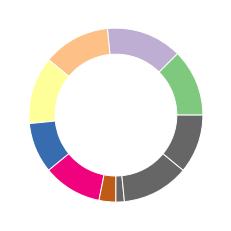

In [166]:
plt.pie(np.random.randint(0,10,10) ,
        wedgeprops= dict(width = 0.3),
        colors = my_colours)
plt.show()

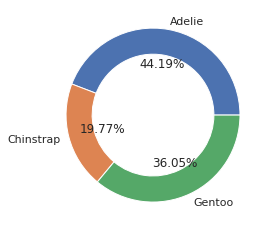

In [169]:
plt.pie(c , labels = c.index , wedgeprops= dict(width = 0.3) , autopct="%.2f%%")
plt.show()

In [171]:
c = pd.crosstab(p.species,p.island)

In [172]:
c = c.T

In [173]:
c

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     124
Dream          56         68       0
Torgersen      52          0       0

In [178]:
c.sum(axis = 1)

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

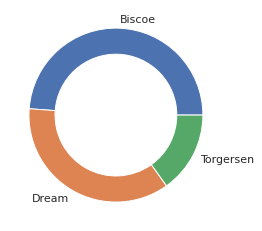

In [180]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3))
plt.show()

In [181]:
c.values.flatten()

array([ 44,   0, 124,  56,  68,   0,  52,   0,   0])

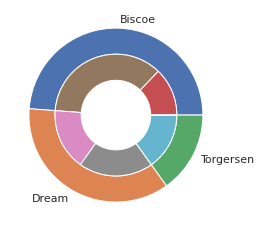

In [182]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3))
plt.pie(c.values.flatten() ,  radius = 1 - 0.3 , wedgeprops = dict(width = 0.3))
plt.show()

In [183]:
cmap = plt.get_cmap('tab20c')
outer_colours = cmap(np.array([0,4,8]))
inner_colours = cmap(np.array([1,2,3,5,6,7,9,10,11]))

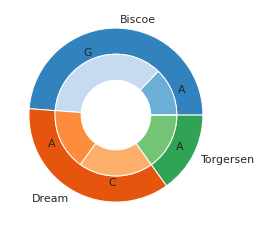

In [187]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3), colors  = outer_colours)
plt.pie(c.values.flatten() ,  radius = 1 - 0.3 ,
        labels = ['A','','G','A','C','','A','',''],
        wedgeprops = dict(width = 0.3) ,
        colors  = inner_colours)
plt.show()

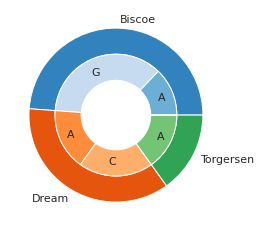

In [188]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3), colors  = outer_colours)
plt.pie(c.values.flatten() ,  radius = 1 - 0.3 ,
        labels = ['A','','G','A','C','','A','',''],
        labeldistance = 0.75,
        wedgeprops = dict(width = 0.3) ,
        colors  = inner_colours)
plt.show()

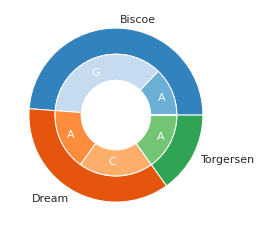

In [189]:
plt.pie(c.sum(axis = 1),labels = c.index ,  radius = 1 , wedgeprops = dict(width = 0.3), colors  = outer_colours)
plt.pie(c.values.flatten() ,  radius = 1 - 0.3 ,
        labels = ['A','','G','A','C','','A','',''],
        labeldistance = 0.75,textprops = dict(color = "w"),
        wedgeprops = dict(width = 0.3) ,
        colors  = inner_colours)
plt.show()